In [ ]:
import pandas as pd
import numpy as np

data_60s = pd.read_csv('dataset-of-60s.csv')
data_70s = pd.read_csv('dataset-of-70s.csv')
data_80s = pd.read_csv('dataset-of-80s.csv')
data_90s = pd.read_csv('dataset-of-90s.csv')
data_00s = pd.read_csv('dataset-of-00s.csv')
data_10s = pd.read_csv('dataset-of-10s.csv')

data = pd.concat([data_60s, data_70s, data_80s, data_90s, data_00s, data_10s])

print(data.isnull().sum())

data.dropna(subset=['target'], inplace=True)

numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


In [ ]:
import statsmodels.api as sm

X = data.drop(columns=['track', 'artist', 'uri', 'target'])
y = data['target']

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()

model.summary()


Optimization terminated successfully.
         Current function value: 0.527497
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                41106
Model:                          Logit   Df Residuals:                    41090
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.2390
Time:                        02:16:41   Log-Likelihood:                -21683.
converged:                       True   LL-Null:                       -28493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4827      0.175      2.760      0.006       0.140       0.826
danceability         3.3016      0.093     35.625      0.000       3.120       3.483
energy              -1.9241      0.100    -19.233      0.000      -2.120      -1.728
key                  0.0101      0.003      3.031      0.002       0.004       0.017
loudness             0.1072      0.004     24.285      0.000       0.099       0.116
mode                 0.3882      0.026     14.830      0.000       0.337       0.439
speechiness         -3.2196      0.157    -20.567      0.000      -3.526      -2.913
acousticness        -1.4013      0.053    -26.459      0.000      -1.505      -1.298
instrumentalness    -3.3709      0.067    -50.268      0.000      -3.502      -3.239
liveness            -0.2026      0.069     -2.921      0.003      -0.339      -0.067
valence              0.3583      0.060      5.956      0.000       0.240       0.476
tempo                0.0021      0.000      4.848      0.000       0.001       0.003
duration_ms      -4.981e-07   2.74e-07     -1.820      0.069   -1.03e-06    3.82e-08
time_signature       0.1420      0.032      4.454      0.000       0.080       0.205
chorus_hit          -0.0023      0.001     -3.233      0.001      -0.004      -0.001
sections            -0.0089      0.006     -1.380      0.168      -0.022       0.004
====================================================================================
"""

In [ ]:
significant_features = model.pvalues[model.pvalues <= 0.05].index
X_significant = X[significant_features]

model_significant = sm.Logit(y, X_significant).fit()

print(model_significant.summary())


Optimization terminated successfully.
         Current function value: 0.528021
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41106
Model:                          Logit   Df Residuals:                    41092
Method:                           MLE   Df Model:                           13
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.2382
Time:                        02:16:41   Log-Likelihood:                -21705.
converged:                       True   LL-Null:                       -28493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3055      0.172      1.773      0.076      -0.032       0.643
danceabilit

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

coefficients = model_significant.params

coef_interpretation = []
for idx, coef in coefficients.items():
    coef_interpretation.append((idx, coef, np.exp(coef)))

print(coef_interpretation)

y_pred = model_significant.predict(X_significant)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y, y_pred_class)
precision = precision_score(y, y_pred_class)
recall = recall_score(y, y_pred_class)
confusion = confusion_matrix(y, y_pred_class)

evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Confusion Matrix': confusion
}

print(evaluation_results)


[('const', 0.30546762849904213, 1.3572595478742115), ('danceability', 3.258699273507944, 26.015675846367877), ('energy', -1.9581122065978935, 0.14112458366978625), ('key', 0.0100400283661492, 1.0100905985512825), ('loudness', 0.10979913379876279, 1.1160538704411906), ('mode', 0.39887354770085814, 1.4901451744096934), ('speechiness', -3.1918270907422075, 0.0410967148742183), ('acousticness', -1.3686835386672513, 0.2544417018287209), ('instrumentalness', -3.3870598918215653, 0.03380792989197922), ('liveness', -0.20655708680388704, 0.8133798268769102), ('valence', 0.42492866873417695, 1.5294813159338532), ('tempo', 0.0019947373281180266, 1.0019967281401176), ('time_signature', 0.13855443403939177, 1.1486122034704331), ('chorus_hit', -0.0021206289106488517, 0.9978816180342467)]
{'Accuracy': 0.7275823480757068, 'Precision': 0.6951316173709899, 'Recall': 0.8107332262929986, 'Confusion Matrix': array([[13245,  7308],
       [ 3890, 16663]])}


In [ ]:
data_by_decade = {
    '60s': data_60s,
    '70s': data_70s,
    '80s': data_80s,
    '90s': data_90s,
    '00s': data_00s,
    '10s': data_10s
}

performance_by_decade = {}

for decade, data_subset in data_by_decade.items():
    X_subset = data_subset[significant_features.drop('const')]
    y_subset = data_subset['target']

    X_subset = sm.add_constant(X_subset)

    y_pred_subset = model_significant.predict(X_subset)
    y_pred_class_subset = [1 if x > 0.5 else 0 for x in y_pred_subset]

    accuracy_subset = accuracy_score(y_subset, y_pred_class_subset)
    precision_subset = precision_score(y_subset, y_pred_class_subset)
    recall_subset = recall_score(y_subset, y_pred_class_subset)
    confusion_subset = confusion_matrix(y_subset, y_pred_class_subset)

    performance_by_decade[decade] = {
        'Accuracy': accuracy_subset,
        'Precision': precision_subset,
        'Recall': recall_subset,
        'Confusion Matrix': confusion_subset
    }

print(performance_by_decade)


{'60s': {'Accuracy': 0.6662809534829901, 'Precision': 0.6814852235412983, 'Recall': 0.6243925017357094, 'Confusion Matrix': array([[3060, 1261],
       [1623, 2698]])}, '70s': {'Accuracy': 0.6984290497038372, 'Precision': 0.6893585647579258, 'Recall': 0.7223796033994334, 'Confusion Matrix': array([[2619, 1264],
       [1078, 2805]])}, '80s': {'Accuracy': 0.7365373480023162, 'Precision': 0.6859353664087392, 'Recall': 0.8726114649681529, 'Confusion Matrix': array([[2074, 1380],
       [ 440, 3014]])}, '90s': {'Accuracy': 0.7644927536231884, 'Precision': 0.7109826589595376, 'Recall': 0.8913043478260869, 'Confusion Matrix': array([[1760, 1000],
       [ 300, 2460]])}, '00s': {'Accuracy': 0.7813351498637602, 'Precision': 0.7157784743991641, 'Recall': 0.9332425068119891, 'Confusion Matrix': array([[1848, 1088],
       [ 196, 2740]])}, '10s': {'Accuracy': 0.7549234135667396, 'Precision': 0.6913869983571932, 'Recall': 0.9209127852453892, 'Confusion Matrix': array([[1884, 1315],
       [ 253, 2

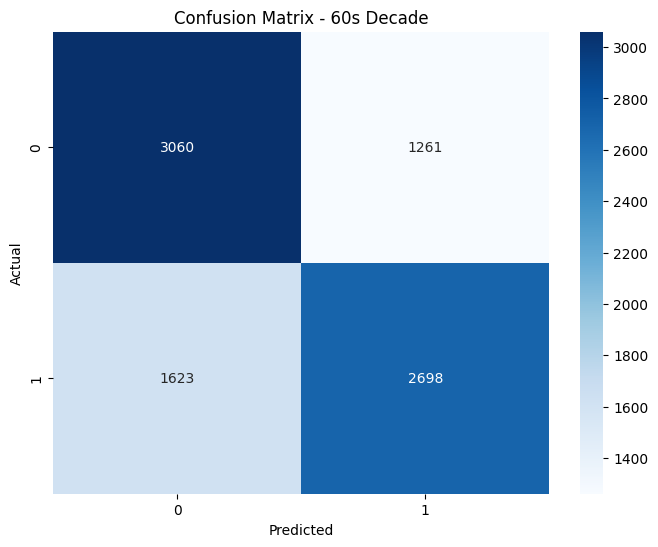

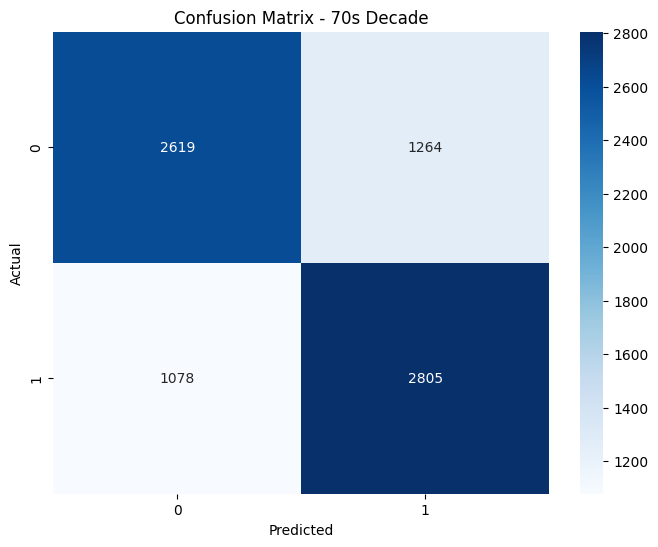

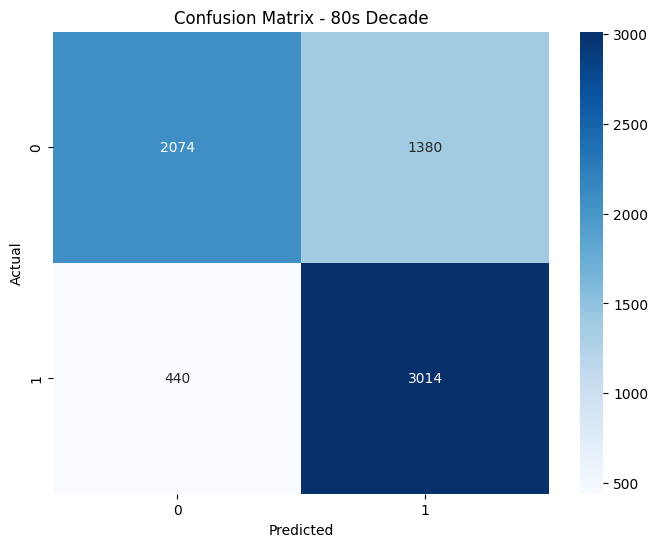

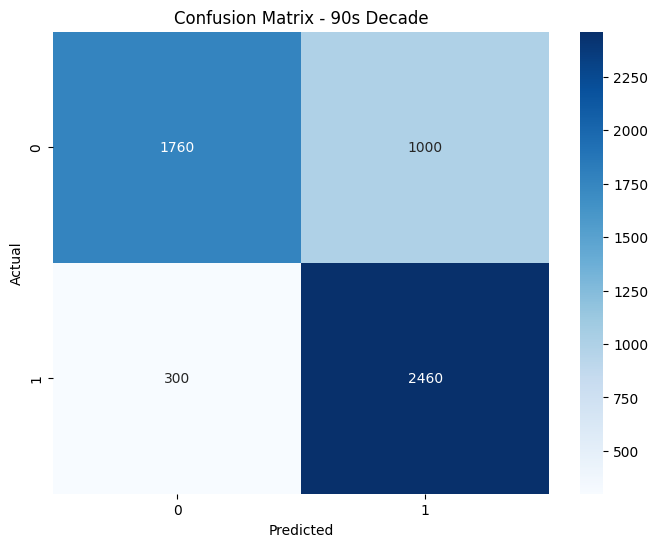

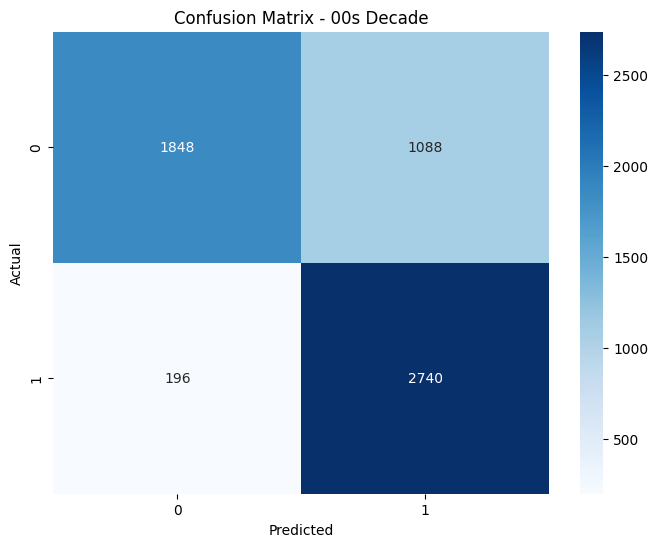

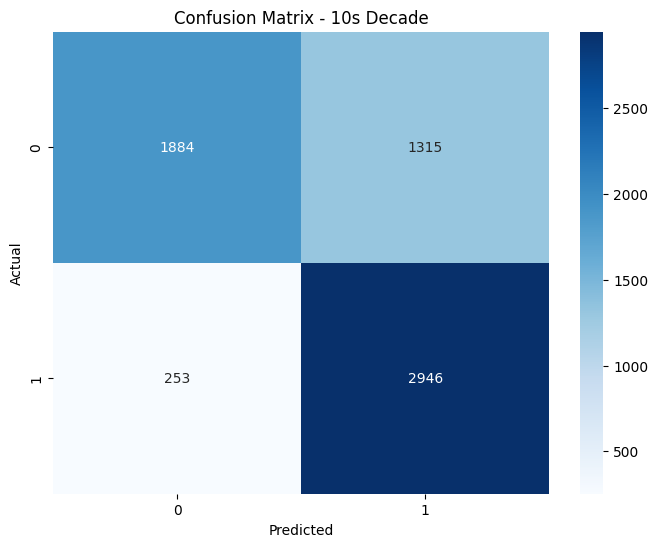

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for decade, metrics in performance_by_decade.items():
    plot_confusion_matrix(metrics['Confusion Matrix'], f'{decade} Decade')


[('const', 0.30546762849904213, 1.3572595478742115), ('danceability', 3.258699273507944, 26.015675846367877), ('energy', -1.9581122065978935, 0.14112458366978625), ('key', 0.0100400283661492, 1.0100905985512825), ('loudness', 0.10979913379876279, 1.1160538704411906), ('mode', 0.39887354770085814, 1.4901451744096934), ('speechiness', -3.1918270907422075, 0.0410967148742183), ('acousticness', -1.3686835386672513, 0.2544417018287209), ('instrumentalness', -3.3870598918215653, 0.03380792989197922), ('liveness', -0.20655708680388704, 0.8133798268769102), ('valence', 0.42492866873417695, 1.5294813159338532), ('tempo', 0.0019947373281180266, 1.0019967281401176), ('time_signature', 0.13855443403939177, 1.1486122034704331), ('chorus_hit', -0.0021206289106488517, 0.9978816180342467)]
{'Accuracy': 0.7275823480757068, 'Precision': 0.6951316173709899, 'Recall': 0.8107332262929986, 'Confusion Matrix': array([[13245,  7308],
       [ 3890, 16663]])}


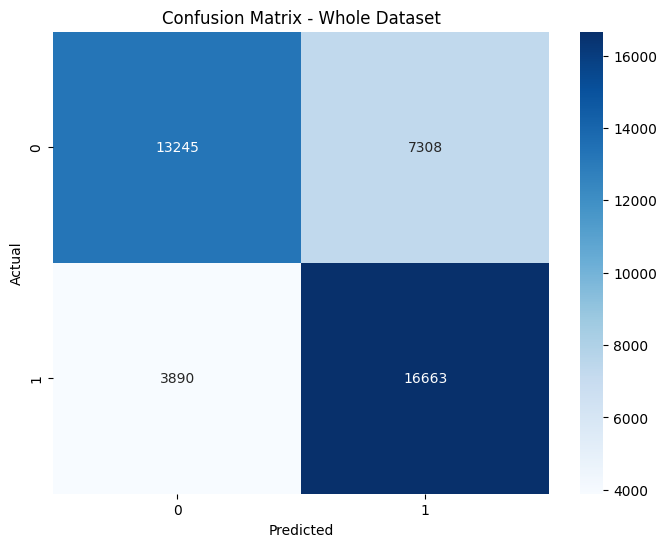

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = model_significant.params

coef_interpretation = []
for idx, coef in coefficients.items():
    coef_interpretation.append((idx, coef, np.exp(coef)))

print(coef_interpretation)

y_pred = model_significant.predict(X_significant)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y, y_pred_class)
precision = precision_score(y, y_pred_class)
recall = recall_score(y, y_pred_class)
confusion = confusion_matrix(y, y_pred_class)

evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Confusion Matrix': confusion
}

print(evaluation_results)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(confusion, 'Whole Dataset')


In [ ]:
song_counts_by_decade = {
    '60s': len(data_60s),
    '70s': len(data_70s),
    '80s': len(data_80s),
    '90s': len(data_90s),
    '00s': len(data_00s),
    '10s': len(data_10s)
}

total_songs = sum(song_counts_by_decade.values())

print("Number of songs analyzed in each decade:")
for decade, count in song_counts_by_decade.items():
    print(f"{decade}: {count} songs")

print(f"\nTotal number of songs analyzed: {total_songs} songs")


Number of songs analyzed in each decade:
60s: 8642 songs
70s: 7766 songs
80s: 6908 songs
90s: 5520 songs
00s: 5872 songs
10s: 6398 songs

Total number of songs analyzed: 41106 songs


In [ ]:
song_counts_by_decade = {
    '60s': len(data_60s),
    '70s': len(data_70s),
    '80s': len(data_80s),
    '90s': len(data_90s),
    '00s': len(data_00s),
    '10s': len(data_10s)
}

total_songs = sum(song_counts_by_decade.values())

print("Number of songs analyzed in each decade:")
for decade, count in song_counts_by_decade.items():
    print(f"{decade}: {count} songs")

print(f"\nTotal number of songs analyzed: {total_songs} songs")

print("\nPercentage of flops vs hits for each decade:")
for decade, data_subset in data_by_decade.items():
    flops = len(data_subset[data_subset['target'] == 0])
    hits = len(data_subset[data_subset['target'] == 1])
    total = flops + hits
    flop_percentage = (flops / total) * 100
    hit_percentage = (hits / total) * 100
    print(f"{decade}: Flops: {flop_percentage:.2f}%, Hits: {hit_percentage:.2f}%")


Number of songs analyzed in each decade:
60s: 8642 songs
70s: 7766 songs
80s: 6908 songs
90s: 5520 songs
00s: 5872 songs
10s: 6398 songs

Total number of songs analyzed: 41106 songs

Percentage of flops vs hits for each decade:
60s: Flops: 50.00%, Hits: 50.00%
70s: Flops: 50.00%, Hits: 50.00%
80s: Flops: 50.00%, Hits: 50.00%
90s: Flops: 50.00%, Hits: 50.00%
00s: Flops: 50.00%, Hits: 50.00%
10s: Flops: 50.00%, Hits: 50.00%


Optimization terminated successfully.
         Current function value: 0.527906
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                32884
Model:                          Logit   Df Residuals:                    32868
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.2384
Time:                        02:16:53   Log-Likelihood:                -17360.
converged:                       True   LL-Null:                       -22793.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4741      0.195      2.426      0.015       0.091       0.857
danceabilit

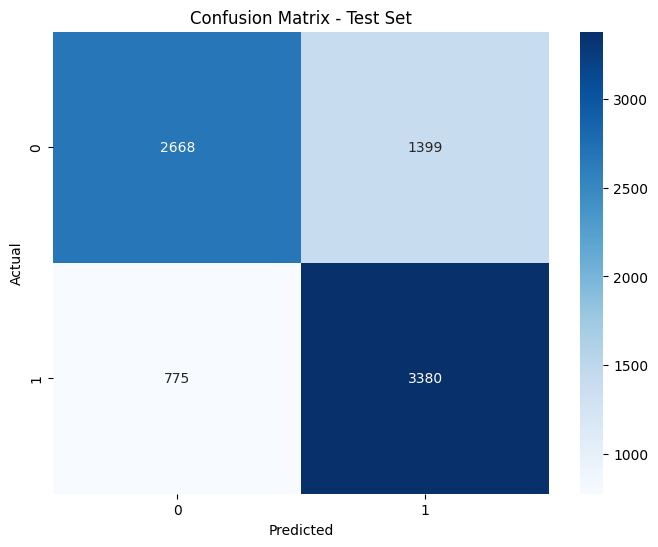

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(columns=['track', 'artist', 'uri', 'target'])
y = data['target']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_train_test = sm.Logit(y_train, X_train).fit()

print(model_train_test.summary())

y_pred_test = model_train_test.predict(X_test)
y_pred_class_test = [1 if x > 0.5 else 0 for x in y_pred_test]

accuracy_test = accuracy_score(y_test, y_pred_class_test)
precision_test = precision_score(y_test, y_pred_class_test)
recall_test = recall_score(y_test, y_pred_class_test)
confusion_test = confusion_matrix(y_test, y_pred_class_test)

evaluation_results_test = {
    'Accuracy': accuracy_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'Confusion Matrix': confusion_test
}

print(evaluation_results_test)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(confusion_test, 'Test Set')


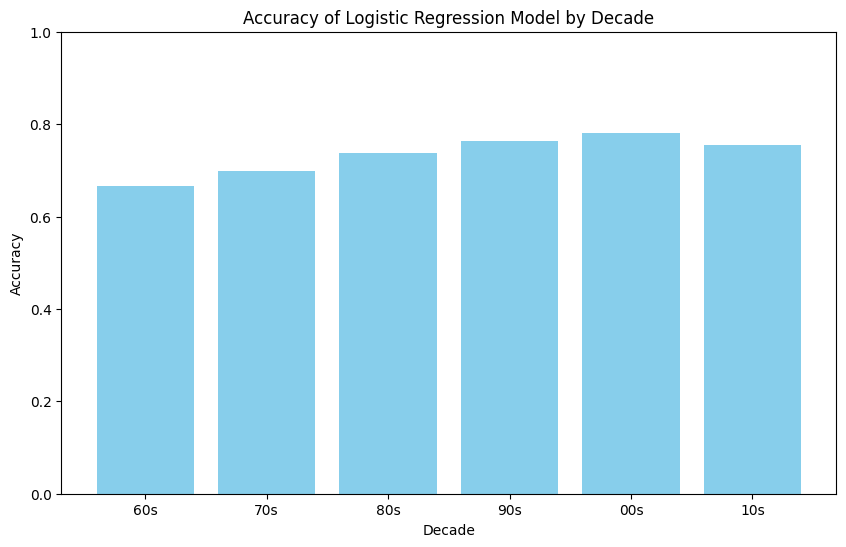

In [ ]:
import matplotlib.pyplot as plt

accuracies = [performance_by_decade[decade]['Accuracy'] for decade in performance_by_decade]

decades = list(performance_by_decade.keys())

plt.figure(figsize=(10, 6))
plt.bar(decades, accuracies, color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model by Decade')
plt.ylim(0, 1)
plt.show()


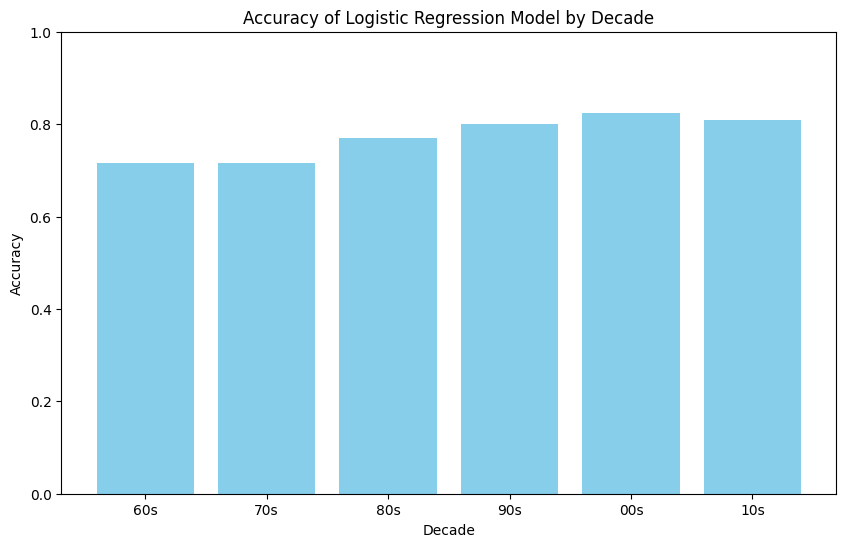

In [ ]:
significant_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'chorus_hit'
]

performance_by_decade = {}

def fit_logistic_regression(data_subset, significant_features):
    X = data_subset[significant_features]
    y = data_subset['target']

    X = sm.add_constant(X)

    model = sm.Logit(y, X).fit(disp=0)

    y_pred = model.predict(X)
    y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

    accuracy = accuracy_score(y, y_pred_class)

    return accuracy

for decade, data_subset in {'60s': data_60s, '70s': data_70s, '80s': data_80s, '90s': data_90s, '00s': data_00s, '10s': data_10s}.items():
    accuracy = fit_logistic_regression(data_subset, significant_features)
    performance_by_decade[decade] = accuracy

plt.figure(figsize=(10, 6))
plt.bar(performance_by_decade.keys(), performance_by_decade.values(), color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model by Decade')
plt.ylim(0, 1)
plt.show()

In [ ]:
print(performance_by_decade.values())

dict_values([0.7165008099976857, 0.7150399175894927, 0.7705558772437753, 0.8009057971014493, 0.8232288828337875, 0.8080650203188496])


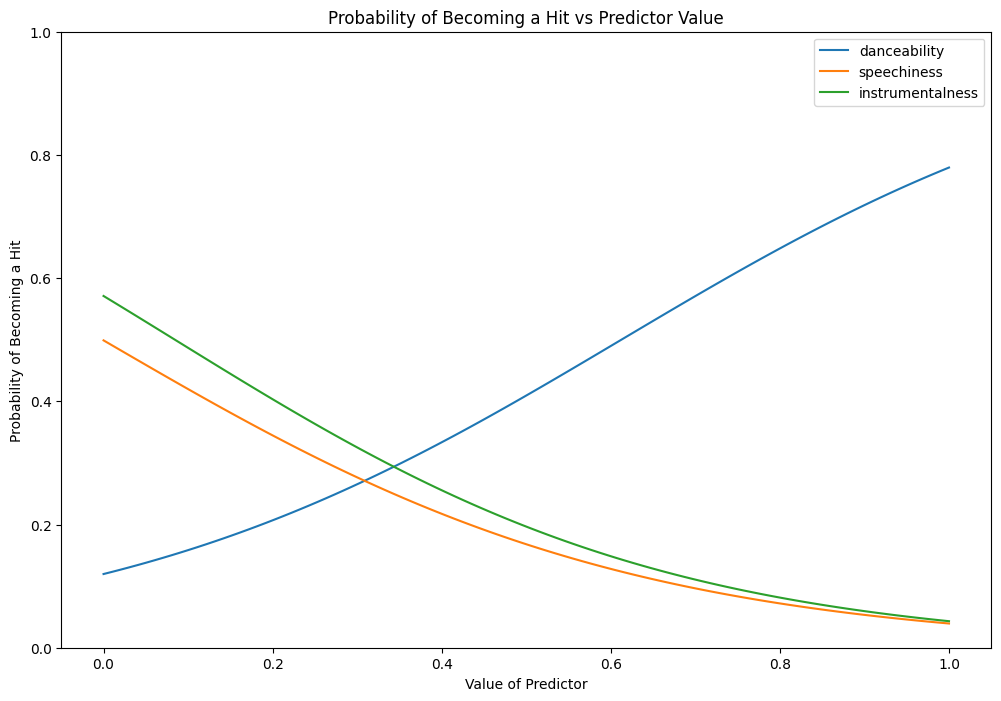

In [ ]:
significant_predictors = ['danceability', 'speechiness', 'instrumentalness']

avg_values = data[significant_features].mean().to_dict()

def calculate_probabilities(predictor, model, avg_values):
    X_vals = np.linspace(0, 1, 100)
    probs = []

    for val in X_vals:
        X = avg_values.copy()
        X[predictor] = val
        X['const'] = 1
        log_odds = sum([model.params[key] * X[key] for key in X.keys()])
        odds = np.exp(log_odds)
        prob = odds / (1 + odds)
        probs.append(prob)

    return X_vals, probs

plt.figure(figsize=(12, 8))

for predictor in significant_predictors:
    X_vals, probs = calculate_probabilities(predictor, model_significant, avg_values)
    plt.plot(X_vals, probs, label=predictor)

plt.xlabel('Value of Predictor')
plt.ylabel('Probability of Becoming a Hit')
plt.title('Probability of Becoming a Hit vs Predictor Value')
plt.legend()
plt.ylim(0, 1)
plt.show()

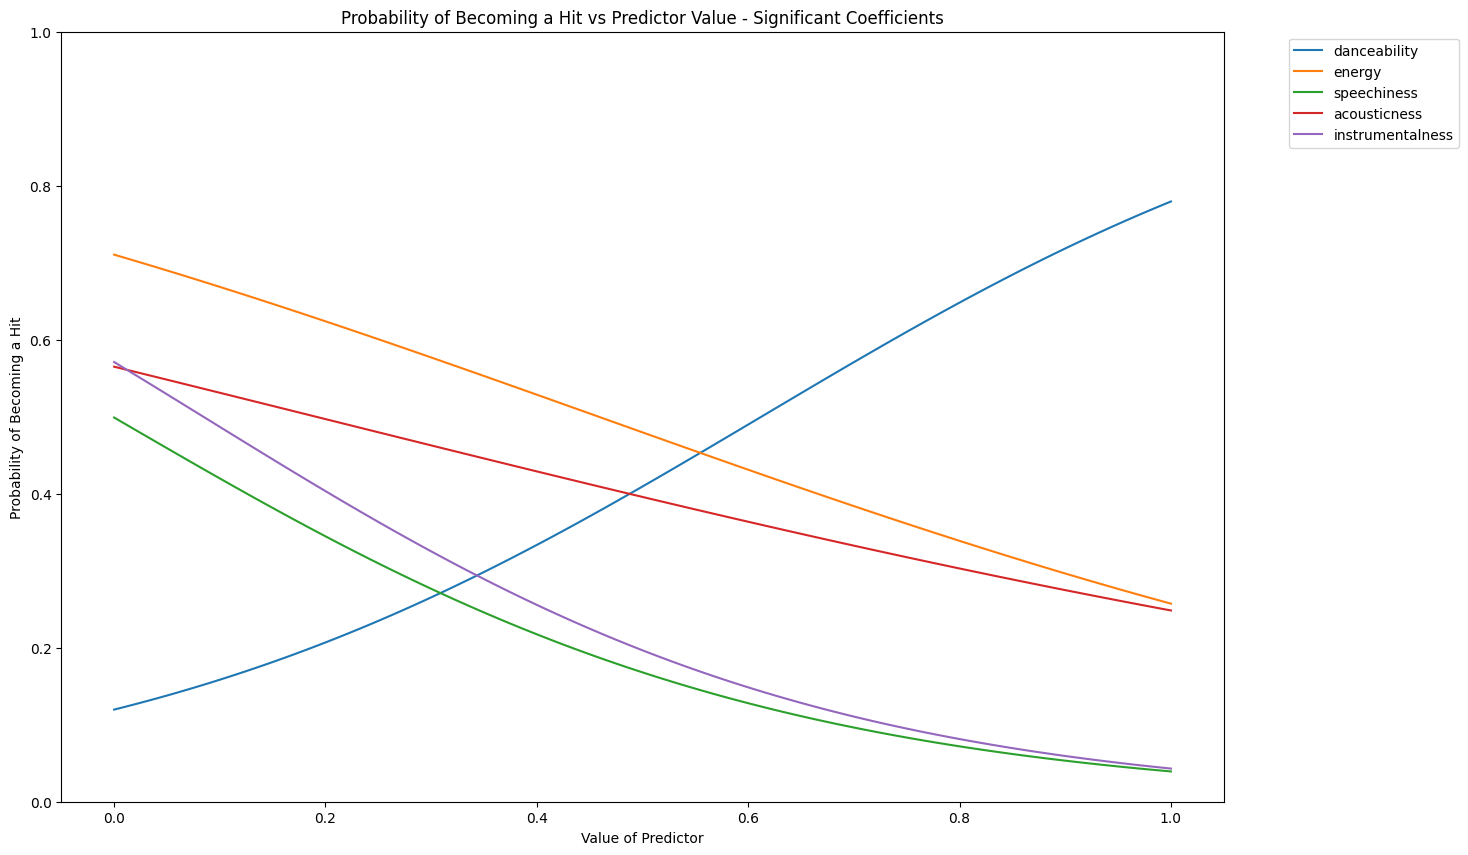

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

significant_predictors = [
    'danceability', 'energy', 'speechiness',
    'acousticness', 'instrumentalness',
]

avg_values = data[significant_features].mean().to_dict()

def calculate_probabilities(predictor, model, avg_values):
    X_vals = np.linspace(0, 1, 100)
    probs = []

    for val in X_vals:
        X = avg_values.copy()
        X[predictor] = val
        X['const'] = 1
        log_odds = sum([model.params[key] * X[key] for key in X.keys()])
        odds = np.exp(log_odds)
        prob = odds / (1 + odds)
        probs.append(prob)

    return X_vals, probs

plt.figure(figsize=(15, 10))

for predictor in significant_predictors:
    X_vals, probs = calculate_probabilities(predictor, model_significant, avg_values)
    plt.plot(X_vals, probs, label=predictor)

plt.xlabel('Value of Predictor')
plt.ylabel('Probability of Becoming a Hit')
plt.title('Probability of Becoming a Hit vs Predictor Value - Significant Coefficients')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.show()
